# Intro to persistent homology of a scalar function define on the edges of a graph using the approach of Edge-valued Clique (EVC) Filtrations


## This reproduces figures 1 and 2 in the paper


### Minh Quang Le, 9/10/2021

In [1]:
%pylab inline 
import networkx as nx
import matplotlib.colors as colors
import sys
import gudhi as gd

sys.path.append('../utils/')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from EVC_util import *
from util import *

# 1. Create and visualize undirected graph with function on the edges

In [3]:
G = make_toy_graph()
node_colors = 3.5*np.ones(len(list(G.nodes))) #list(np.random.rand(len(list(G.nodes()))))
A = np.array((nx.adjacency_matrix(G)).todense())

print(A)

[[0 4 0 0 0 0 1]
 [0 0 3 1 0 0 0]
 [0 3 0 3 0 0 0]
 [4 1 2 0 2 0 0]
 [0 0 0 0 0 2 1]
 [0 0 2 0 0 0 0]
 [1 0 0 0 0 0 0]]


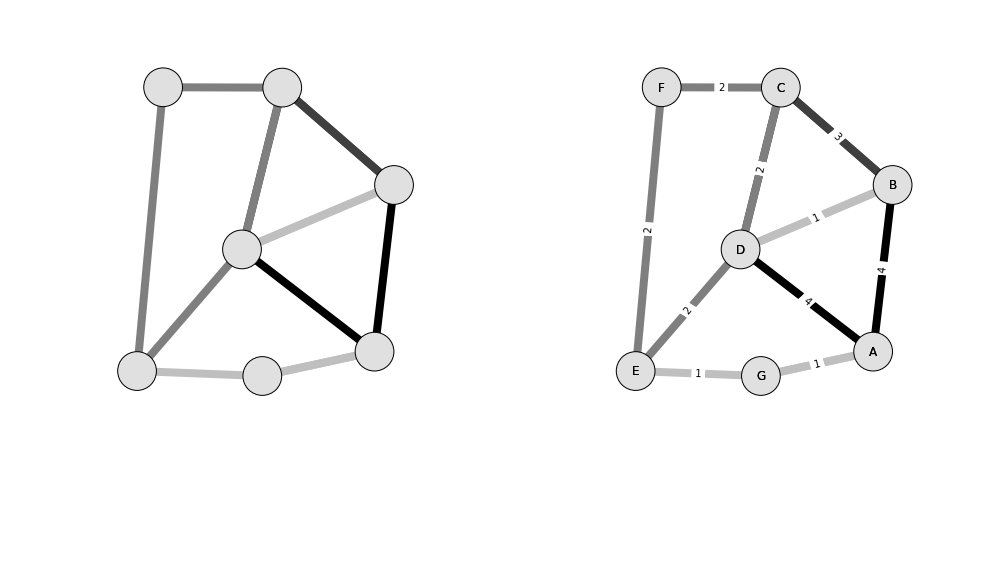

In [4]:
#create undirected graph
m = get_edge_colors(A,A)
edge_colors = m
#node_cmap = plt.cm.gray
node_cmap = plt.cm.gray
edge_cmap = plt.cm.gray.reversed()
s = edge_cmap
node_size = 1500
edge_width = 8
vmin = 0
vmax = 4

T=2
fig, ax = plt.subplots(1,T,figsize=(14,8))
for i in range(T):
    #fig1,ax = plt.subplots(1,1,figsize=(2.5,2.5))
    draw_toy_undirected_graph(G,vmin,vmax,node_size,node_colors,edge_colors,edge_width,node_cmap,edge_cmap,s,ax[i])
plt.tight_layout()
savefig('undirected.pdf')

In [5]:
def get_filtration_matrix_3(XX,max_value=.1,numsteps=8):
    
    # this function defines step parameters of a filtration that includes edges according to descending order, 
    # since Gudhi includes edges according to ascending order
    
    #symmetrize input matrix
    m,n = shape(XX)
    XX = max_matrix(XX,m,n)
    
    fil_matrix = max_value - XX
    fil_matrix = fil_matrix - np.diag(np.diag(fil_matrix))
    
    return fil_matrix, max_value - np.linspace(.18,max_value*.92,numsteps)


In [6]:
def max_matrix(M,m,n):
    # this function symmetrizes a matrix by B_{ij} = max (A_{ij} , A_{ji})
    
    K=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            K[i][j]=max(M[i][j],M[j][i])
    return (K)


# 2 Define and visualize EVC filtration 

In [7]:
#create EVC filtration
max_value=np.max(A)*1.1
filtration_matrix,filtration_steps = get_filtration_matrix_3(A,max_value=max_value,numsteps=6)
filtration_steps = array([round(s,4) for s in filtration_steps])
filtration = get_weighted_filtration (G,filtration_matrix,max_value-filtration_steps)


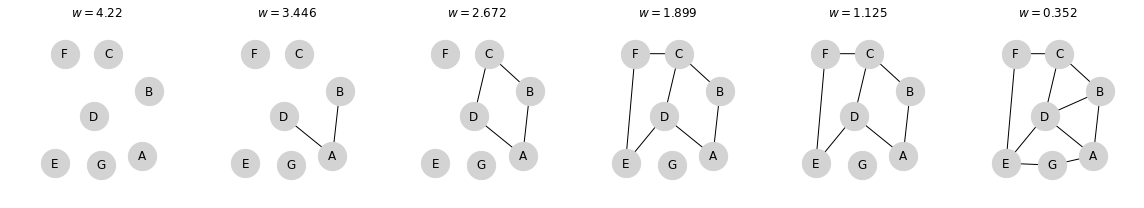

In [8]:
#visualize EVC filtration
VR_titles = ['$w = '+str(filtration_steps[i])[:5]+'$' for i in range(len(filtration_steps))]
make_wfiltration_fig(G,filtration,VR_titles,'')
plt.tight_layout()


# 3 Compute and visualize persistent homology under EVC filtration

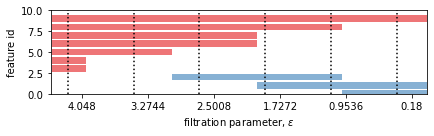

In [9]:
diag = dist2PD (filtration_matrix, max_dim=2, max_edge_length=5)[1]


f1,ax = subplots(1,1,figsize=(6,2))       
gd.plot_persistence_barcode (persistence=diag,axes=ax)

for i,step in enumerate(max_value - filtration_steps):
    plt.plot([step,step],[0,10],'k:')

#x = [.0,.01,.02,.03,.04,.05,.06]
#values = [round(max_value-xx,4) for xx in x]
values = [ round(max_value-xx,4)  for xx in filtration_steps]

plt.xlim([-.02,max_value])
plt.xticks (filtration_steps,values)
plt.ylabel('feature id')
plt.xlabel('filtration parameter, $\epsilon$')

max_value

plt.title('')
plt.tight_layout()
